# Question:
In the Atari game Blackjack, suppose a player keeps playing until they win their first hand. If the probability of winning a single hand is 
42%, what is the probability that the player wins for the first time on their 5th hand?

# Study Description:
This simulation estimates the probability that a player wins for the first time on their 5th hand. We assume each hand is independent, the probability of winning a single hand is 42%, as shown in google, and that the player continues playing until they achieve their first win.

Each trial simulates multiple hands using a random process: for each hand, a random number determines if the player wins (success) or loses (failure) according to probability 42%. We record the number of hands it takes to win the first hand. Repeating this process for many trials allows us to estimate the probability of winning specifically on the 5th hand, as well as the mean and standard deviation of the number of hands until first win. We then compare the simulation to the theoretical geometric distribution, where P(first win on 5th hand) = (1-p)^4 times p. The 4 comes from the 4 losses before we win on the 5th trial.

In [21]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install "gymnasium[toy-text]"
!pip install ale-py
!pip install autorom[accept-rom-license]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 51.1 MB/s eta 0:00:00 0:00:0136m0:00:01
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [22]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

In [23]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
import seaborn as sns
import numpy as np

# Create environment
env = gym.make("Blackjack-v1", render_mode="rgb_array")
observation, info = env.reset()

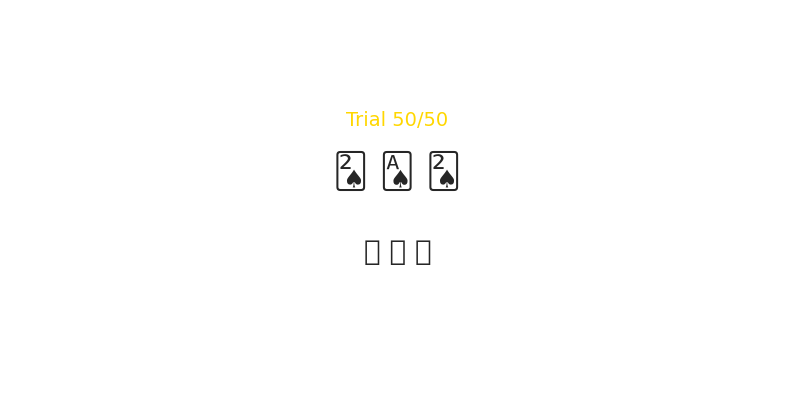

Simulated 50 trials
Hands until first win (mean ± std): 2.34 ± 2.16
Simulated P(first win on 5th hand) = 0.0000
Theoretical P(first win on 5th hand) = 0.0412


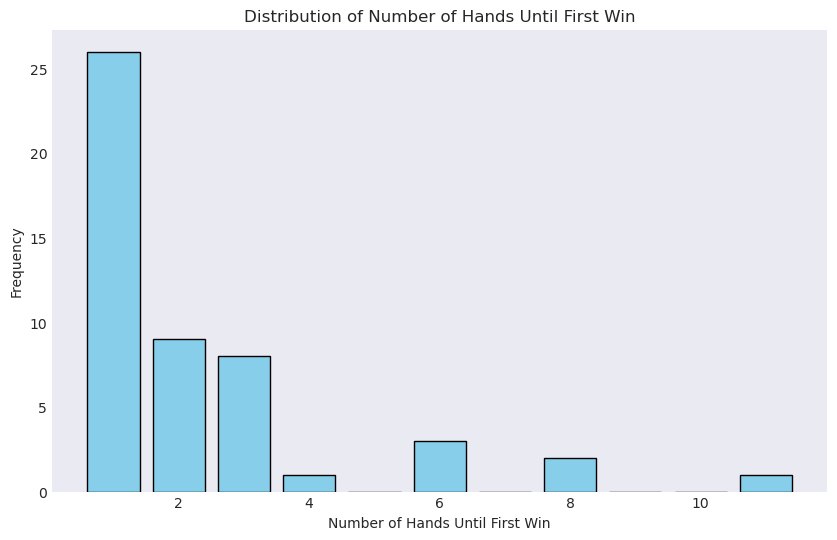

In [24]:
# -----------------------------
# SIMULATION PARAMETERS
# -----------------------------
p = 0.45             # probability of winning a single hand
num_trials = 50      # number of trials (can increase for stats)
max_hands = 20       # maximum hands per trial for visualization

hands_until_win = []

# -----------------------------
# SETUP FIGURE
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn-v0_8-dark')
ax.set_facecolor("green")
ax.axis('off')

# -----------------------------
# SIMULATION LOOP
# -----------------------------
for trial in range(num_trials):
    hand_count = 0
    won = False
    results_display = []

    while not won and hand_count < max_hands:
        hand_count += 1
        # Random win/loss
        if np.random.rand() < p:
            won = True
            results_display.append("💰")
        else:
            results_display.append("❌")

        # Random card emojis for display
        card_emojis = ["🂡" if np.random.rand() > 0.5 else "🂢" for _ in range(hand_count)]

        # Update visualization
        clear_output(wait=True)
        ax.clear()
        ax.set_facecolor("green")
        ax.axis('off')
        ax.text(0.5, 0.85, f"🃏 Blackjack Simulation", fontsize=18, ha='center', color='white', weight='bold')
        ax.text(0.5, 0.7, f"Trial {trial+1}/{num_trials}", fontsize=14, ha='center', color='gold')
        ax.text(0.5, 0.55, ' '.join(card_emojis), fontsize=25, ha='center')
        ax.text(0.5, 0.35, ' '.join(results_display), fontsize=20, ha='center')
        ax.text(0.5, 0.15, f"Hands until first win: {hand_count}", fontsize=14, ha='center', color='white')
        display(fig)
        time.sleep(0.2)  # adjust speed

    hands_until_win.append(hand_count)

plt.close(fig)

# -----------------------------
# RESULTS
# -----------------------------
hands_until_win = np.array(hands_until_win)
simulated_mean = np.mean(hands_until_win)
simulated_std = np.std(hands_until_win)

# Probability first win occurs on 5th hand
prob_5th = np.mean(hands_until_win == 5)
theoretical_prob_5th = (1 - p)**4 * p

print(f"Simulated {num_trials} trials")
print(f"Hands until first win (mean ± std): {simulated_mean:.2f} ± {simulated_std:.2f}")
print(f"Simulated P(first win on 5th hand) = {prob_5th:.4f}")
print(f"Theoretical P(first win on 5th hand) = {theoretical_prob_5th:.4f}")

# -----------------------------
# HISTOGRAM OF RESULTS
# -----------------------------
plt.figure(figsize=(10,6))
plt.bar(range(1, max(hands_until_win)+1),
        [np.sum(hands_until_win == i) for i in range(1, max(hands_until_win)+1)],
        color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Hands Until First Win")
plt.xlabel("Number of Hands Until First Win")
plt.ylabel("Frequency")
plt.show()